<a href="https://colab.research.google.com/github/AriqF1/dataMining/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel('dataKasus-1.xlsx', sheet_name='2022')

In [7]:
# Menghapus kolom yang semua nilainya NaN
df = df.dropna(axis=1, how='all')

# Menghapus baris yang memiliki nilai NaN
df = df.dropna()


In [8]:
features = ['USIA', 'PARITAS', 'RIW HIPERTENSI', 'RIW PE', 'OBESITAS', 'RIW DM', 'RIW HIPERTENSI/PE DALAM KELUARGA']
df_features = df[features]


In [9]:
label_encoders = {}
for column in df_features.columns:
    if df_features[column].dtype == 'object':
        le = LabelEncoder()
        df_features[column] = le.fit_transform(df_features[column].astype(str))
        label_encoders[column] = le


<ipython-input-9-62ced7be075a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[column] = le.fit_transform(df_features[column].astype(str))
<ipython-input-9-62ced7be075a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[column] = le.fit_transform(df_features[column].astype(str))
<ipython-input-9-62ced7be075a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [10]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)


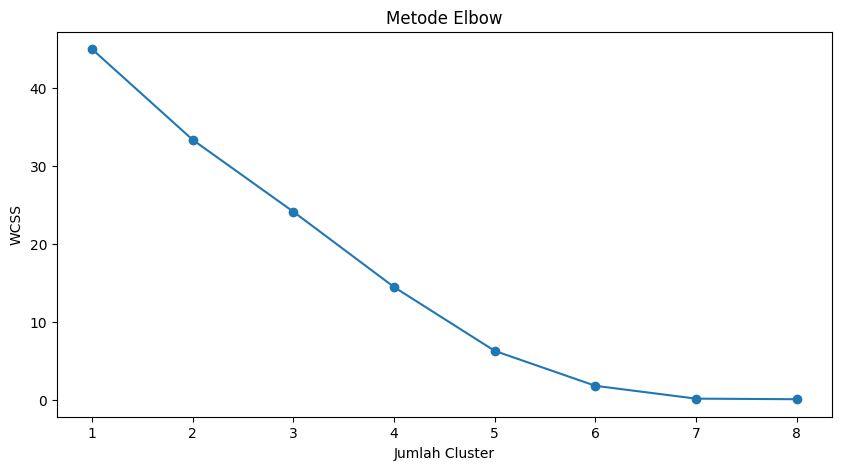

In [14]:
wcss = []
for i in range(1, len(df_scaled)):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(df_scaled)), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_


In [16]:
df['Cluster'] = labels


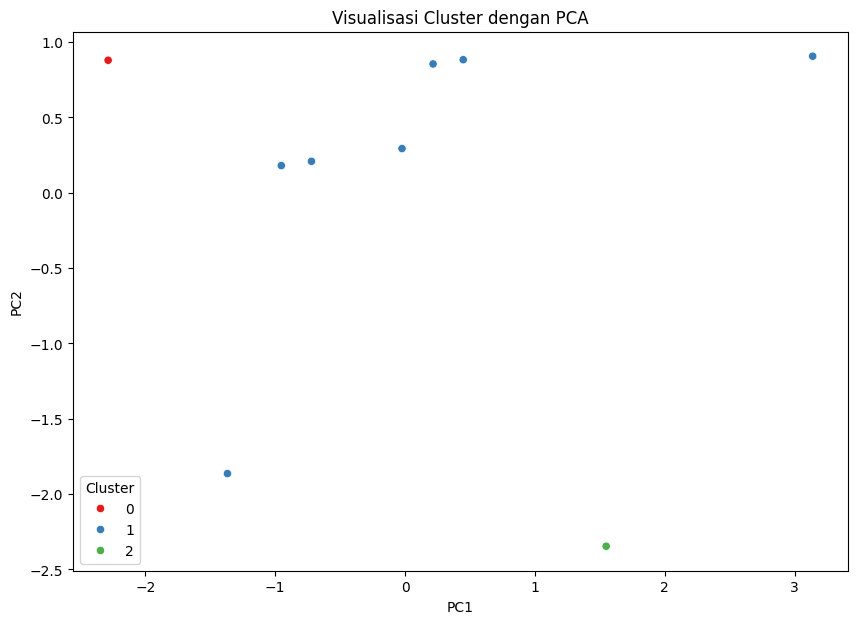

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='Set1')
plt.title('Visualisasi Cluster dengan PCA')
plt.show()


In [20]:
# Mengelompokkan data berdasarkan cluster
cluster_analysis = df.groupby('Cluster')[features].mean(numeric_only=True)
print(cluster_analysis)


          PARITAS
Cluster          
0        1.000000
1        1.571429
2        1.000000
